Punto 1.

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##Variables de entrada.
Humedad = ctrl.Antecedent(np.arange(0,101,1),'Humedad_suelo')
Temperatura = ctrl.Antecedent(np.arange(0,41,1),'Temperatura_pasto')

##Variable de salida.
Apertura = ctrl.Consequent(np.arange(0,101,1),'Porcentaje_apertura')
Apertura1 = ctrl.Consequent(np.arange(0,12,0.5),'apertura1')

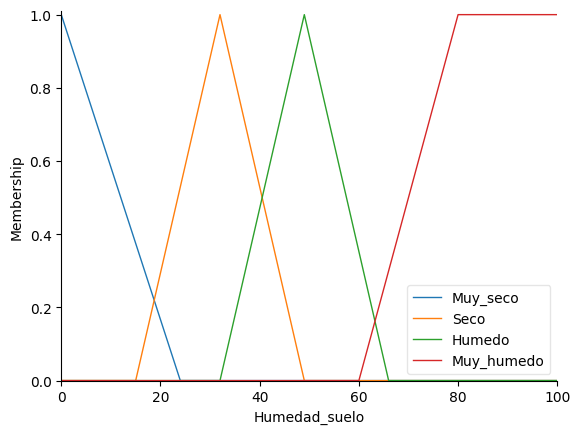

In [ ]:
##Humedad del suelo.
Humedad['Muy_seco'] = fuzz.trimf(Humedad.universe,[0,0,24])
Humedad['Seco'] = fuzz.trimf(Humedad.universe,[15,32,49])
Humedad['Humedo'] = fuzz.trimf(Humedad.universe,[32,49,66])
Humedad['Muy_humedo'] = fuzz.trapmf(Humedad.universe,[60,80,100,100])
Humedad.view()

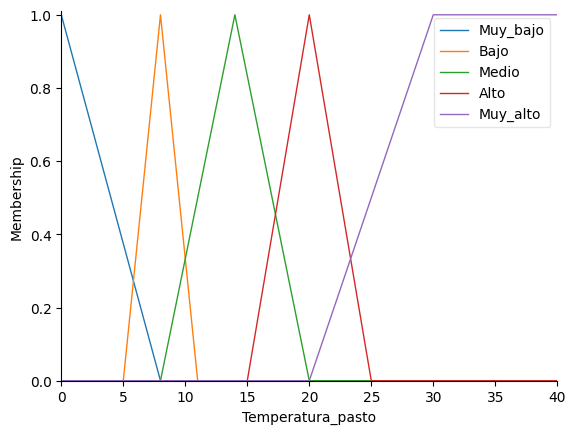

In [ ]:
Temperatura['Muy_bajo'] = fuzz.trimf(Temperatura.universe,[0,0,8])
Temperatura['Bajo'] = fuzz.trimf(Temperatura.universe,[5,8,11])
Temperatura['Medio'] = fuzz.trimf(Temperatura.universe,[8,14,20])
Temperatura['Alto'] = fuzz.trimf(Temperatura.universe,[15,20,25])
Temperatura['Muy_alto'] = fuzz.trapmf(Temperatura.universe,[20,30,40,40])
Temperatura.view()

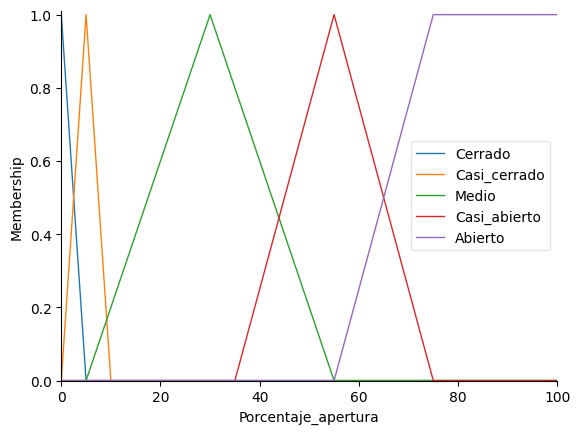

In [ ]:
Apertura['Cerrado'] = fuzz.trimf(Apertura.universe,[0,0,5])
Apertura['Casi_cerrado'] = fuzz.trimf(Apertura.universe,[0,5,10])
Apertura['Medio'] = fuzz.trimf(Apertura.universe,[5,30,55])
Apertura['Casi_abierto'] = fuzz.trimf(Apertura.universe,[35,55,75])
Apertura['Abierto'] = fuzz.trapmf(Apertura.universe,[55,75,100,100])
Apertura.view()

In [ ]:
regla11 = ctrl.Rule(Humedad['Muy_seco'] & Temperatura['Muy_bajo'],Apertura['Medio'])
regla12 = ctrl.Rule(Humedad['Muy_seco'] & Temperatura['Bajo'],Apertura['Medio'])
regla13 = ctrl.Rule(Humedad['Muy_seco'] & Temperatura['Medio'],Apertura['Casi_abierto'])
regla14 = ctrl.Rule(Humedad['Muy_seco'] & Temperatura['Alto'],Apertura['Abierto'])
regla15 = ctrl.Rule(Humedad['Muy_seco'] & Temperatura['Muy_alto'],Apertura['Abierto'])

regla21 = ctrl.Rule(Humedad['Seco'] & Temperatura['Muy_bajo'],Apertura['Casi_cerrado'])
regla22 = ctrl.Rule(Humedad['Seco'] & Temperatura['Bajo'],Apertura['Medio'])
regla23 = ctrl.Rule(Humedad['Seco'] & Temperatura['Medio'],Apertura['Casi_abierto'])
regla24 = ctrl.Rule(Humedad['Seco'] & Temperatura['Alto'],Apertura['Casi_abierto'])
regla25 = ctrl.Rule(Humedad['Seco'] & Temperatura['Muy_alto'],Apertura['Abierto'])

regla31 = ctrl.Rule(Humedad['Humedo'] & Temperatura['Muy_bajo'],Apertura['Cerrado'])
regla32 = ctrl.Rule(Humedad['Humedo'] & Temperatura['Bajo'],Apertura['Cerrado'])
regla33 = ctrl.Rule(Humedad['Humedo'] & Temperatura['Medio'],Apertura['Casi_cerrado'])
regla34 = ctrl.Rule(Humedad['Humedo'] & Temperatura['Alto'],Apertura['Casi_cerrado'])
regla35 = ctrl.Rule(Humedad['Humedo'] & Temperatura['Muy_alto'],Apertura['Casi_cerrado'])

regla41 = ctrl.Rule(Humedad['Muy_humedo'] & Temperatura['Muy_bajo'],Apertura['Cerrado'])
regla42 = ctrl.Rule(Humedad['Muy_humedo'] & Temperatura['Bajo'],Apertura['Cerrado'])
regla43 = ctrl.Rule(Humedad['Muy_humedo'] & Temperatura['Medio'],Apertura['Cerrado'])
regla44 = ctrl.Rule(Humedad['Muy_humedo'] & Temperatura['Alto'],Apertura['Casi_cerrado'])
regla45 = ctrl.Rule(Humedad['Muy_humedo'] & Temperatura['Muy_alto'],Apertura['Casi_cerrado'])

In [ ]:
sistema_control = ctrl.ControlSystem(
    [
        regla11,
        regla12,
        regla13,
        regla14,
        regla15,
        regla21,
        regla22,
        regla23,
        regla24,
        regla25,
        regla31,
        regla32,
        regla33,
        regla34,
        regla35,
        regla41,
        regla42,
        regla43,
        regla44,
        regla45
    ]
)

Controlador = ctrl.ControlSystemSimulation(sistema_control)

In [ ]:
Controlador.input['Humedad_suelo']=50
Controlador.input['Temperatura_pasto']=25
Controlador.compute()

Porcentaje = Controlador.output['Porcentaje_apertura']
print(f"El porcentaje de apertura es de: {Porcentaje} %")

El porcentaje de apertura es de: 4.999999999999999 %


Punto 2.

In [ ]:
##Variables de entrada.
Vistas = ctrl.Antecedent(np.arange(0,101,1),'Cantidad_vistas')
Tiempo = ctrl.Antecedent(np.arange(0,13,1),'Tiempo_estreno')

##Variable de salida.
Probabilidad = ctrl.Consequent(np.arange(0,101,1),'Probabilidad_exito')

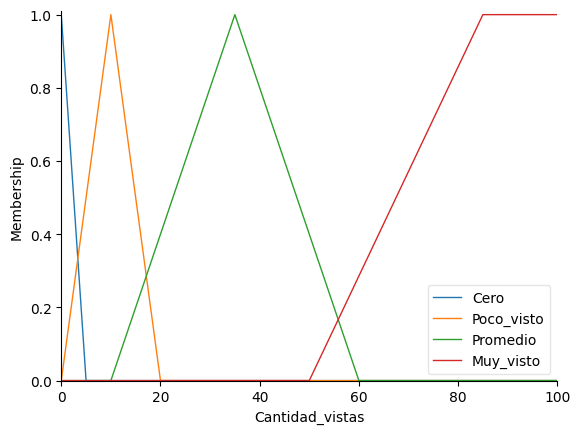

In [ ]:
##Cantidad de visualizaciones.
Vistas['Cero'] = fuzz.trimf(Vistas.universe,[0,0,5])
Vistas['Poco_visto'] = fuzz.trimf(Vistas.universe,[0,10,20])
Vistas['Promedio'] = fuzz.trimf(Vistas.universe,[10,35,60])
Vistas['Muy_visto'] =fuzz.trapmf(Vistas.universe,[50,85,100,100])
Vistas.view()

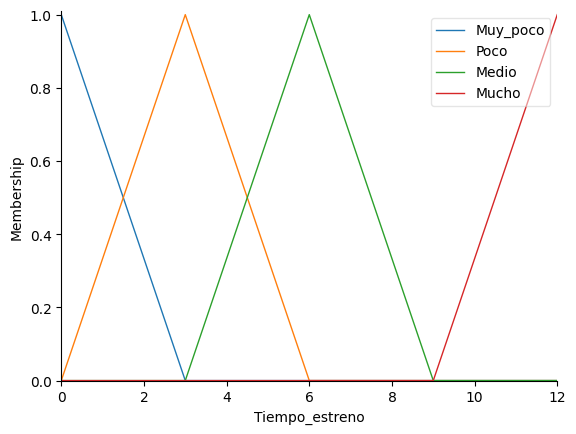

In [ ]:
Tiempo['Muy_poco'] = fuzz.trimf(Tiempo.universe,[0,0,3])
Tiempo['Poco'] = fuzz.trimf(Tiempo.universe,[0,3,6])
Tiempo['Medio'] = fuzz.trimf(Tiempo.universe,[3,6,9])
Tiempo['Mucho'] = fuzz.trapmf(Tiempo.universe,[9,12,12,12])
Tiempo.view()

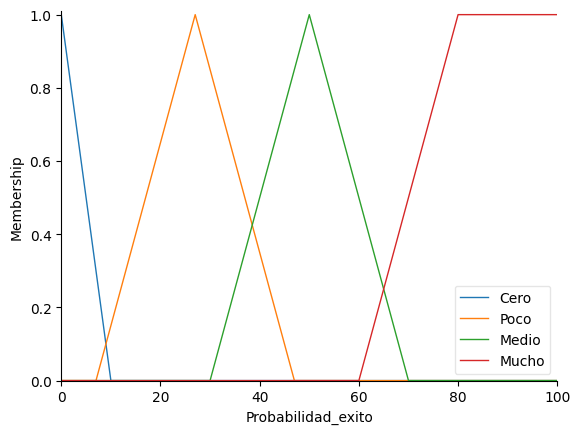

In [ ]:
Probabilidad['Cero'] = fuzz.trimf(Probabilidad.universe,[0,0,10])
Probabilidad['Poco'] = fuzz.trimf(Probabilidad.universe,[7,27,47])
Probabilidad['Medio'] = fuzz.trimf(Probabilidad.universe,[30,50,70])
Probabilidad['Mucho'] = fuzz.trapmf(Probabilidad.universe,[60,80,100,100])
Probabilidad.view()

In [ ]:
reglas11 = ctrl.Rule(Vistas['Cero'] & Tiempo['Muy_poco'],Probabilidad['poco'])
reglas12 = ctrl.Rule(Vistas['Cero'] & Tiempo['Poco'],Probabilidad['Cero'])
reglas13 = ctrl.Rule(Vistas['Cero'] & Tiempo['Medio'],Probabilidad['Cero'])
reglas14 = ctrl.Rule(Vistas['Cero'] & Tiempo['Mucho'],Probabilidad['Cero'])

reglas21 = ctrl.Rule(Vistas['Poco_visto'] & Tiempo['Muy_poco'],Probabilidad['Poco'])
reglas22 = ctrl.Rule(Vistas['Poco_visto'] & Tiempo['Poco'],Probabilidad['Poco'])
reglas23 = ctrl.Rule(Vistas['Poco_visto'] & Tiempo['Medio'],Probabilidad['Poco'])
reglas24 = ctrl.Rule(Vistas['Poco_visto'] & Tiempo['Mucho'],Probabilidad['Cero'])

reglas31 = ctrl.Rule(Vistas['Promedio'] & Tiempo['Muy_poco'],Probabilidad['Medio'])
reglas32 = ctrl.Rule(Vistas['Promedio'] & Tiempo['Poco'],Probabilidad['Medio'])
reglas33 = ctrl.Rule(Vistas['Promedio'] & Tiempo['Medio'],Probabilidad['Poco'])
reglas34 = ctrl.Rule(Vistas['Promedio'] & Tiempo['Mucho'],Probabilidad['Poco'])

reglas41 = ctrl.Rule(Vistas['Muy_visto'] & Tiempo['Muy_poco'],Probabilidad['Mucho'])
reglas42 = ctrl.Rule(Vistas['Muy_visto'] & Tiempo['Poco'],Probabilidad['Mucho'])
reglas43 = ctrl.Rule(Vistas['Muy_visto'] & Tiempo['Medio'],Probabilidad['Medio'])
reglas44 = ctrl.Rule(Vistas['Muy_visto'] & Tiempo['Mucho'],Probabilidad['Medio'])

In [ ]:
sistema_control1 = ctrl.ControlSystem(
    [
        reglas11,
        reglas12,
        reglas13,
        reglas14,
        reglas21,
        reglas22,
        reglas23,
        reglas24,
        reglas31,
        reglas32,
        reglas33,
        reglas34,
        reglas41,
        reglas42,
        reglas43,
        reglas44
    ]
)

Controlador1 = ctrl.ControlSystemSimulation(sistema_control1)

In [ ]:
Controlador1.input['Cantidad_vistas']=90
Controlador1.input['Tiempo_estreno']=6
Controlador1.compute()

Porcentaje1 = Controlador1.output['Probabilidad_exito']
print(f"La probabilidad de exito es de: {Porcentaje1} %")

La probabilidad de exito es de: 49.99999999999999 %
